<a href="https://colab.research.google.com/github/risav-pyakurel/Python/blob/main/DataWareHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


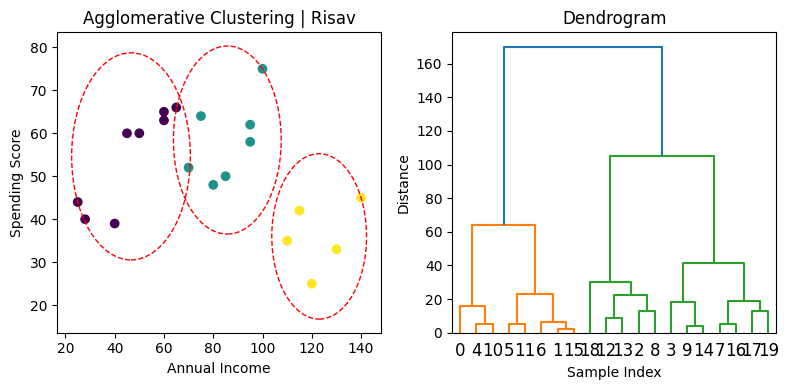


Data with Cluster Labels:
     Annual_Income  Spending_Score  Cluster
0              40              39        0
1              60              63        0
2             120              25        2
3             100              75        1
4              25              44        0
5              50              60        0
6              65              66        0
7              80              48        1
8             130              33        2
9              95              62        1
10             28              40        0
11             45              60        0
12            110              35        2
13            115              42        2
14             95              58        1
15             60              65        0
16             85              50        1
17             70              52        1
18            140              45        2
19             75              64        1


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

df = pd.read_csv('/content/sample_data/customer_data.csv')

# Selecting features for clustering
X = df[['Annual_Income', 'Spending_Score']]

# Perform Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
df['Cluster'] = agg_clustering.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(8, 4))

# First subplot: Scatter plot for clusters
plt.subplot(1, 2, 1)
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')

# Loop through the clusters and draw circles around each one
unique_clusters = np.unique(df['Cluster'])
for cluster in unique_clusters:
    # Get points in the current cluster
    cluster_points = df[df['Cluster'] == cluster]

    # Calculate the center (mean) and radius (max distance from center)
    center = cluster_points[['Annual_Income', 'Spending_Score']].mean()
    radius = np.max(np.linalg.norm(cluster_points[['Annual_Income', 'Spending_Score']] - center, axis=1))

    # Draw a circle around the cluster
    circle = plt.Circle((center['Annual_Income'], center['Spending_Score']), radius, color='r', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Agglomerative Clustering | Risav')

# Second subplot: Dendrogram
plt.subplot(1, 2, 2)
Z = linkage(X, method='ward')  # Linkage matrix using Ward's method
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Show both plots
plt.tight_layout()
plt.show()

# Print the data with the cluster labels
print("\nData with Cluster Labels:\n", df)


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Display initial dataset
print(df.head())

# Check for missing values
print("\n*****Missing values before preprocessing*******\n")
print(df.isnull().sum())

# Handle missing values
df = df.copy()  # Ensure modifications are applied to a new DataFrame
df['age'] = df['age'].fillna(df['age'].mean())  # Fill missing age with mean

# Add "Unknown" to the categories of 'deck' and fill missing values
df['deck'] = df['deck'].astype('category').cat.add_categories('Unknown')
df['deck'] = df['deck'].fillna('Unknown')  # Fill missing deck values

# Fill missing values in 'embarked'
df['embarked'] = df['embarked'].fillna('Unknown')

# Check missing values after handling
print("\n********Missing values after preprocessing*********\n")
print(df.isnull().sum())

# Normalize age and fare
scaler = MinMaxScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
print("\nData after normalizing:")
print(df[['age', 'fare']].head())

# Drop unnecessary columns
df.drop(columns=['embarked', 'embark_town'], inplace=True)
print("\nDropped 'embarked' and 'embark_town' columns:")
print(df.head())

# Categorize fare into groups
fare_bins = [0, 0.4, 0.8, 1.0]
fare_labels = ['Budget', 'Medium', 'Premium']
df['fare_group'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels)
print("\nFare group counts:")
print(df['fare_group'].value_counts())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

*****Missing values before preprocessing*******

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# New dataset
dataset = [['Bread', 'Milk', 'Butter'],
           ['Bread', 'Diapers', 'Beer', 'Eggs'],
           ['Milk', 'Diapers', 'Beer', 'Cola'],
           ['Bread', 'Milk', 'Diapers', 'Beer'],
           ['Bread', 'Milk', 'Diapers', 'Cola'],
           ['Bread', 'Milk', 'Butter', 'Beer'],
           ['Diapers', 'Beer', 'Cola']]

# Initialize the Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# Convert to DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with minimum support of 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate the length of itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Generate Association Rules with 'lift' as the metric
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display the Association Rules
print("\nAssociation Rules:")
print(rules)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
!pip install --upgrade mlxtend


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# New dataset
dataset = [['Bread', 'Milk', 'Butter'],
           ['Bread', 'Diapers', 'Beer', 'Eggs'],
           ['Milk', 'Diapers', 'Beer', 'Cola'],
           ['Bread', 'Milk', 'Diapers', 'Beer'],
           ['Bread', 'Milk', 'Diapers', 'Cola'],
           ['Bread', 'Milk', 'Butter', 'Beer'],
           ['Diapers', 'Beer', 'Cola']]

# Initialize the Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# Convert to DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with minimum support of 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate the length of itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Generate Association Rules with 'lift' as the metric
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display the Association Rules
print("\nAssociation Rules:")
print(rules)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
!pip uninstall mlxtend

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: mlxtend 0.23.3
Uninstalling mlxtend-0.23.3:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/mlxtend-0.23.3.dist-info/*
    /usr/local/lib/python3.11/dist-packages/mlxtend/*
Proceed (Y/n)? Y
  Successfully uninstalled mlxtend-0.23.3


In [ ]:

!pip install mlxtend


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# New dataset
dataset = [['Bread', 'Milk', 'Butter'],
           ['Bread', 'Diapers', 'Beer', 'Eggs'],
           ['Milk', 'Diapers', 'Beer', 'Cola'],
           ['Bread', 'Milk', 'Diapers', 'Beer'],
           ['Bread', 'Milk', 'Diapers', 'Cola'],
           ['Bread', 'Milk', 'Butter', 'Beer'],
           ['Diapers', 'Beer', 'Cola']]

# Initialize the Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# Convert to DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with minimum support of 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate the length of itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Generate Association Rules with 'lift' as the metric
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display the Association Rules
print("\nAssociation Rules:")
print(rules)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# New dataset (different from the previous one but similar in structure)
dataset = [['Apple', 'Banana', 'Orange'],
           ['Banana', 'Apple', 'Milk'],
           ['Apple', 'Milk', 'Eggs', 'Butter'],
           ['Banana', 'Milk', 'Eggs', 'Cheese'],
           ['Apple', 'Eggs', 'Orange'],
           ['Banana', 'Milk', 'Butter'],
           ['Apple', 'Orange', 'Eggs']]

# Initialize the Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# Convert to DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with minimum support of 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate the length of itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Generate Association Rules with 'lift' as the metric
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display the Association Rules
print("\nAssociation Rules:")
print(rules)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# New dataset (similar to the original one)
dataset = [['Apple', 'Banana', 'Orange'],
           ['Banana', 'Apple', 'Milk'],
           ['Apple', 'Milk', 'Eggs', 'Butter'],
           ['Banana', 'Milk', 'Eggs', 'Cheese'],
           ['Apple', 'Eggs', 'Orange'],
           ['Banana', 'Milk', 'Butter'],
           ['Apple', 'Orange', 'Eggs']]

# Initialize the Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# Convert to DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with minimum support of 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate the length of itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Generate Association Rules with 'lift' as the metric
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display the Association Rules
print("\nAssociation Rules:")
print(rules)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
!pip install --upgrade mlxtend


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# New dataset (similar to the original one)
dataset = [['Apple', 'Banana', 'Orange'],
           ['Banana', 'Apple', 'Milk'],
           ['Apple', 'Milk', 'Eggs', 'Butter'],
           ['Banana', 'Milk', 'Eggs', 'Cheese'],
           ['Apple', 'Eggs', 'Orange'],
           ['Banana', 'Milk', 'Butter'],
           ['Apple', 'Orange', 'Eggs']]

# Initialize the Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# Convert to DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with minimum support of 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate the length of itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Generate Association Rules with 'lift' as the metric
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display the Association Rules
print("\nAssociation Rules:")
print(rules)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1,num_itemsets=len(frequent_itemsets))
print("\nAssociation Rules:\n"+rules)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


TypeError: can only concatenate str (not "frozenset") to str

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


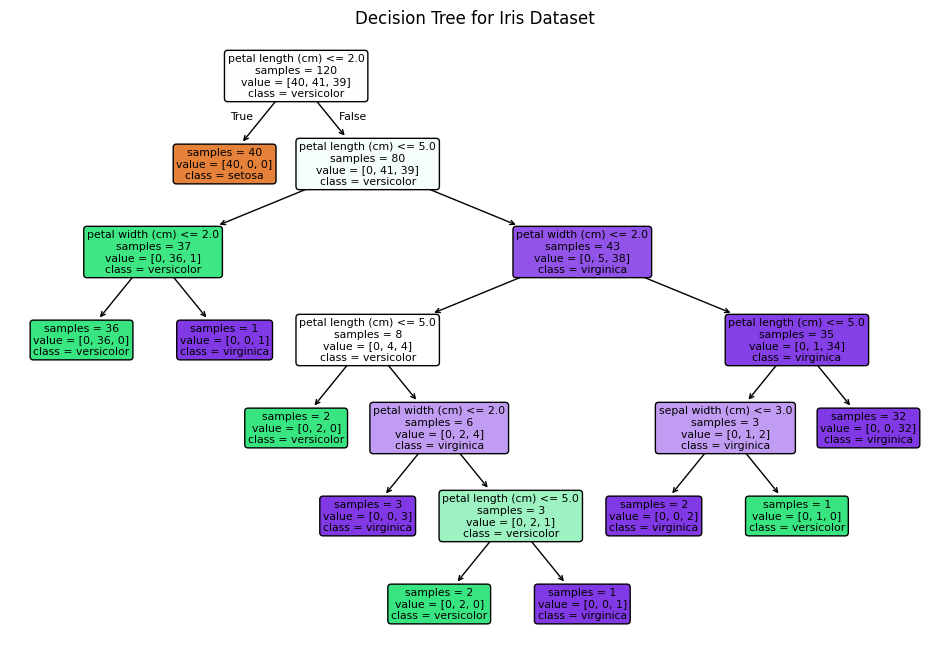

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Species')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    impurity=False,  # Remove entropy/impurity values
    precision=0  # Avoid showing unnecessary decimals
)
plt.title("Decision Tree for Iris Dataset")
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
True Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



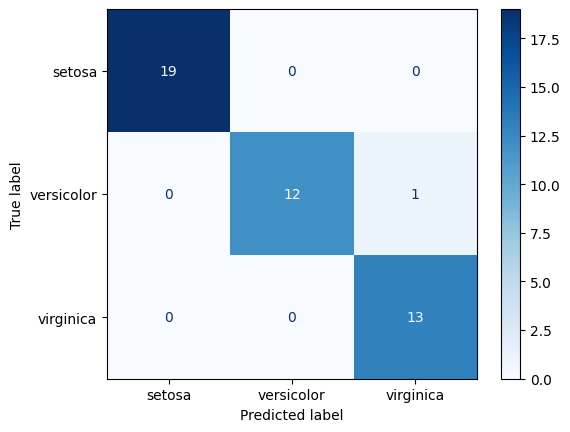

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal/petal length and width
y = iris.target  # Labels: 0 (Setosa), 1 (Versicolor), 2 (Virginica)
classes = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Display results
print("Predictions:", y_pred)
print("True Labels:", y_test)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=classes))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


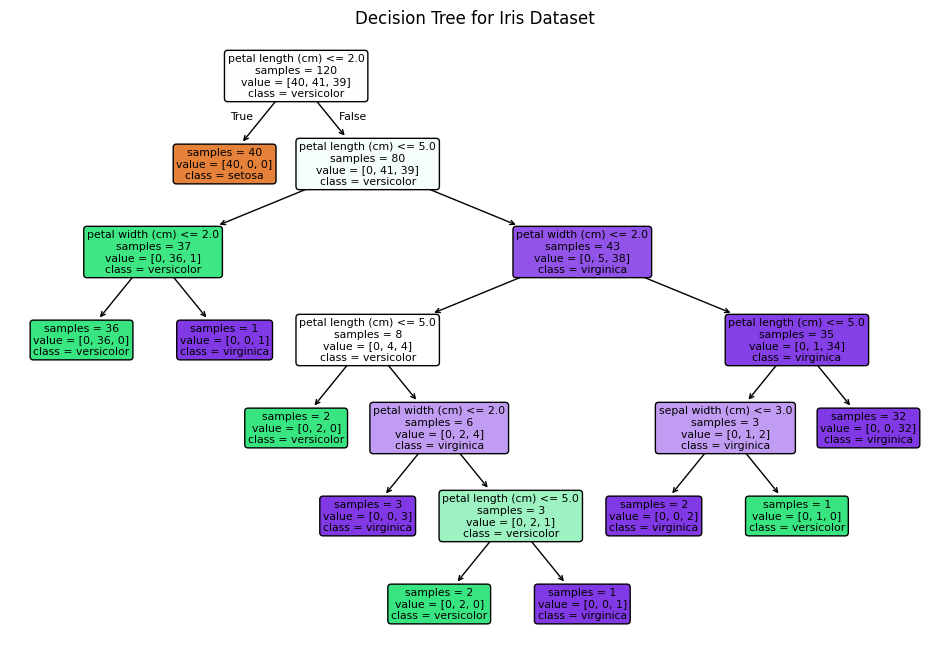

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal/petal length and width
y = iris.target  # Labels: 0 (Setosa), 1 (Versicolor), 2 (Virginica)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Plot the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=iris.feature_names,  # Feature names from the Iris dataset
    class_names=iris.target_names,     # Class names for target labels
    filled=True,
    rounded=True,
    impurity=False,  # Remove entropy/impurity values
    precision=0      # Avoid showing unnecessary decimals
)
plt.title("Decision Tree for Iris Dataset")
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error: 1.2923314440807299
R-squared Score: 0.013795337532284901


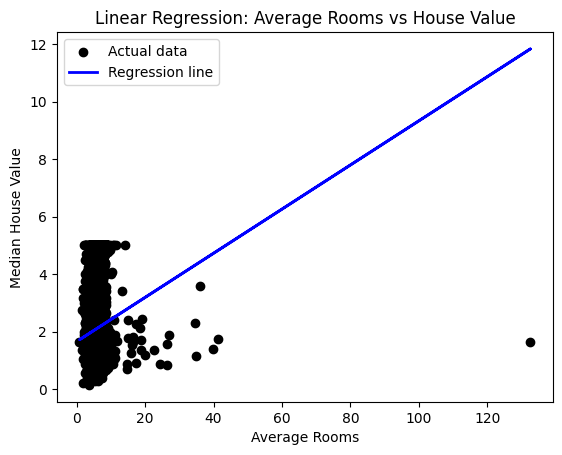

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Add the target (Median House Value)

# Using 'AveRooms' (average number of rooms) as the feature and 'MedHouseVal' as the target
X = df[['AveRooms']].values  # Feature: average rooms
y = df['MedHouseVal'].values  # Target: median house value

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting the actual vs predicted values
plt.scatter(X_test, y_test, color="black", label="Actual data")
plt.plot(X_test, y_pred, color="blue", linewidth=2, label="Regression line")
plt.title("Linear Regression: Average Rooms vs House Value")
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error: 2900.193628493482
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995
   Actual   Predicted
0   219.0  139.547558
1    70.0  179.517208
2   202.0  134.038756
3   230.0  291.417029
4   111.0  123.789659
5    84.0   92.172347
6   242.0  258.232389
7   272.0  181.337321
8    94.0   90.224113
9    96.0  108.633759


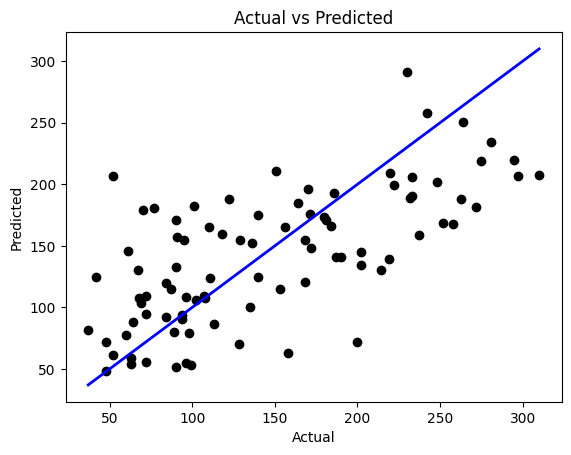

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # Features
y = diabetes.target  # Target variable (disease progression)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error and printing coefficients
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Creating a DataFrame to compare actual vs predicted values
num_values_to_display = 10
comparison_df = pd.DataFrame({'Actual': y_test[:num_values_to_display], 'Predicted': y_pred[:num_values_to_display]})
print(comparison_df)

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred, color="black")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linewidth=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


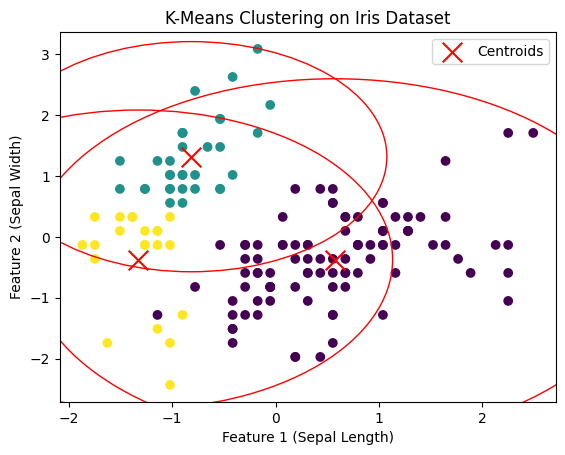

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Use the feature data
X = df.values

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters and centroids
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Draw circles around clusters
for i in range(len(centroids)):
    cluster_points = X_scaled[labels == i]
    radius = np.max(np.linalg.norm(cluster_points - centroids[i], axis=1))
    circle = plt.Circle(centroids[i], radius, color='r', fill=False)
    plt.gca().add_artist(circle)

# Add titles and labels
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target  # Add the target labels (not used in clustering)

# Use two features (for visualization)
X = df[['sepal length (cm)', 'sepal width (cm)']].values.tolist()

# Initialize K-Medoids with 3 clusters (Iris has 3 classes)
initial_medoids = [0, 1, 2]  # Indexes of initial medoids (can be any 3 samples)
kmedoids_instance = kmedoids(X, initial_medoids)
kmedoids_instance.process()

# Get the clusters and assign labels
clusters = kmedoids_instance.get_clusters()
labels = [0] * len(X)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = cluster_id

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Get the medoids (center points of each cluster)
medoids = kmedoids_instance.get_medoids()

# Plot the clusters and medoids
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['Cluster'], cmap='viridis')
for cluster_id, cluster in enumerate(clusters):
    cluster_points = df.iloc[cluster][['sepal length (cm)', 'sepal width (cm)']].values
    center_x = df.iloc[medoids[cluster_id]]['sepal length (cm)']
    center_y = df.iloc[medoids[cluster_id]]['sepal width (cm)']

    # Calculate the radius (max distance from center)
    distances = np.linalg.norm(cluster_points - np.array([center_x, center_y]), axis=1)
    radius = distances.max()  # Largest distance from the center
    circle = plt.Circle((center_x, center_y), radius, color='red', fill=False, linestyle='dashed', linewidth=2)
    plt.gca().add_patch(circle)

# Plot customization
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Medoids Clustering on Iris Dataset')
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'pyclustering'

In [ ]:
!pip install pyclustering


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=91f216dd765b1cf324cb6f451db4876e61ea54718cc9099c6b77c8c52762fd46
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


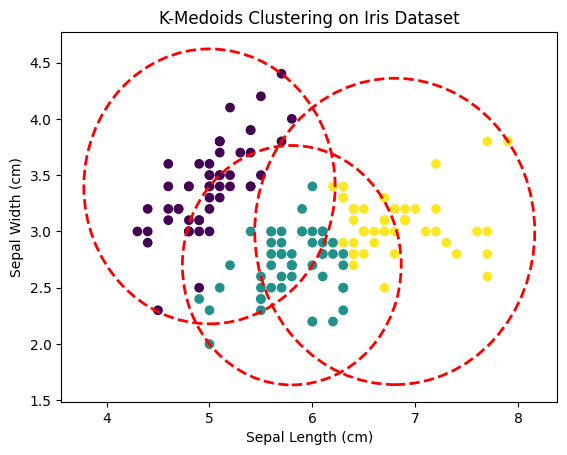

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target  # Add the target labels (not used in clustering)

# Use two features (for visualization)
X = df[['sepal length (cm)', 'sepal width (cm)']].values.tolist()

# Initialize K-Medoids with 3 clusters (Iris has 3 classes)
initial_medoids = [0, 1, 2]  # Indexes of initial medoids (can be any 3 samples)
kmedoids_instance = kmedoids(X, initial_medoids)
kmedoids_instance.process()

# Get the clusters and assign labels
clusters = kmedoids_instance.get_clusters()
labels = [0] * len(X)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = cluster_id

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Get the medoids (center points of each cluster)
medoids = kmedoids_instance.get_medoids()

# Plot the clusters and medoids
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['Cluster'], cmap='viridis')
for cluster_id, cluster in enumerate(clusters):
    cluster_points = df.iloc[cluster][['sepal length (cm)', 'sepal width (cm)']].values
    center_x = df.iloc[medoids[cluster_id]]['sepal length (cm)']
    center_y = df.iloc[medoids[cluster_id]]['sepal width (cm)']

    # Calculate the radius (max distance from center)
    distances = np.linalg.norm(cluster_points - np.array([center_x, center_y]), axis=1)
    radius = distances.max()  # Largest distance from the center
    circle = plt.Circle((center_x, center_y), radius, color='red', fill=False, linestyle='dashed', linewidth=2)
    plt.gca().add_patch(circle)

# Plot customization
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Medoids Clustering on Iris Dataset')
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


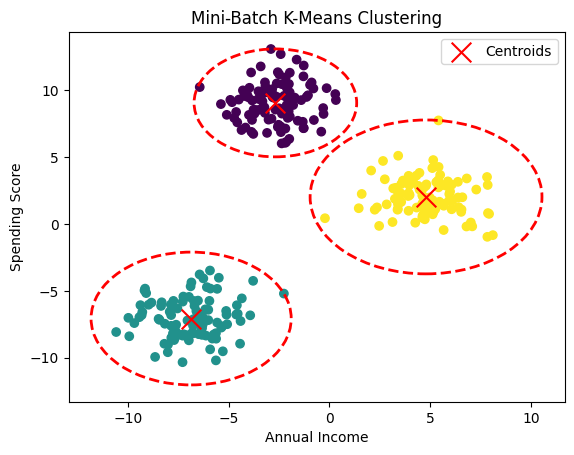

In [ ]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)
df = pd.DataFrame(X, columns=['Annual_Income', 'Spending_Score'])

# Perform MiniBatchKMeans clustering
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
minibatch_kmeans.fit(df)
df['Cluster'] = minibatch_kmeans.labels_

# Get the cluster centers
centers = minibatch_kmeans.cluster_centers_

# Plotting the scatter plot of the data points and the clusters
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')

# Plotting the circles around each cluster
for cluster_id in range(3):
    cluster_points = df[df['Cluster'] == cluster_id][['Annual_Income', 'Spending_Score']].values
    center_x = centers[cluster_id][0]
    center_y = centers[cluster_id][1]
    # Calculate the radius based on the furthest point in the cluster
    distances = np.linalg.norm(cluster_points - np.array([center_x, center_y]), axis=1)
    radius = distances.max()  # Largest distance from the center
    # Add a circle around the cluster
    circle = plt.Circle((center_x, center_y), radius, color='red', fill=False, linestyle='dashed', linewidth=2)
    plt.gca().add_patch(circle)

# Plot the centers of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labeling and displaying the plot
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mini-Batch K-Means Clustering')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


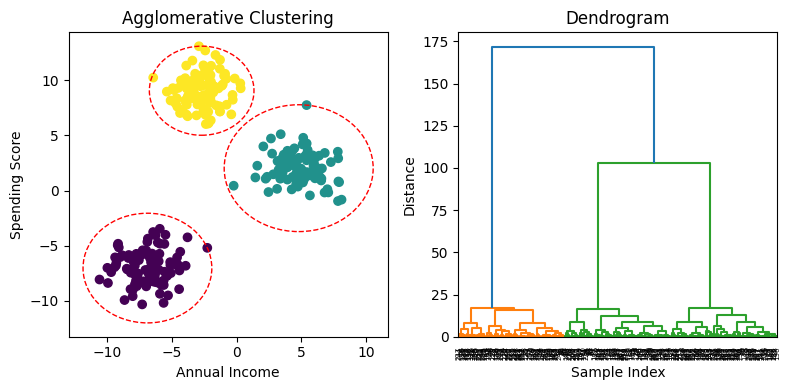

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)
df = pd.DataFrame(X, columns=['Annual_Income', 'Spending_Score'])

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
df['Cluster'] = agg_clustering.fit_predict(X)

# Plotting
plt.figure(figsize=(8, 4))

# First subplot: Scatter plot of clusters with circles around them
plt.subplot(1, 2, 1)
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
unique_clusters = np.unique(df['Cluster'])
for cluster in unique_clusters:
    cluster_points = df[df['Cluster'] == cluster]
    # Calculate the center (mean) and radius (max distance from center)
    center = cluster_points[['Annual_Income', 'Spending_Score']].mean()
    radius = np.max(np.linalg.norm(cluster_points[['Annual_Income', 'Spending_Score']] - center, axis=1))
    # Draw a circle around the cluster
    circle = plt.Circle((center['Annual_Income'], center['Spending_Score']), radius, color='r', fill=False, linestyle='--')
    plt.gca().add_patch(circle)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Agglomerative Clustering')

# Second subplot: Dendrogram
plt.subplot(1, 2, 2)
Z = linkage(X, method='ward')  # Linkage matrix using Ward's method
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: unterminated string literal (detected at line 31) (<ipython-input-18-525f46b5b6dc>, line 31)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


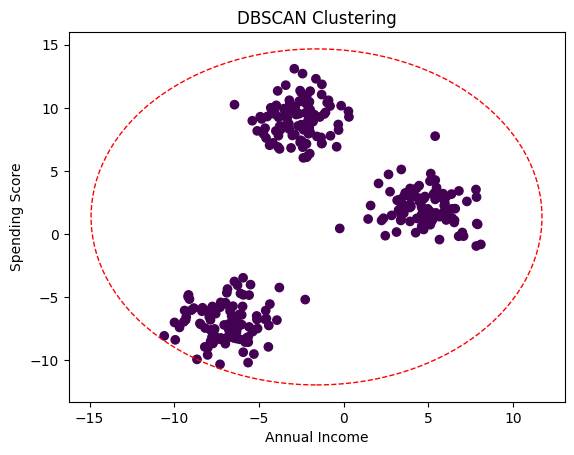

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)
df = pd.DataFrame(X, columns=['Annual_Income', 'Spending_Score'])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=20, min_samples=2)
df['Cluster'] = dbscan.fit_predict(X)

# Plotting
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')

# Loop through unique clusters and add circles around the clusters
unique_clusters = np.unique(df['Cluster'])
for cluster in unique_clusters:
    if cluster == -1:
        continue  # Skip noise points (if any)
    cluster_points = df[df['Cluster'] == cluster]
    center = cluster_points[['Annual_Income', 'Spending_Score']].mean()
    radius = np.max(np.linalg.norm(cluster_points[['Annual_Income', 'Spending_Score']] - center, axis=1))
    # Draw a circle around the cluster
    circle = plt.Circle((center['Annual_Income'], center['Spending_Score']), radius, color='r', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

# Set labels and title
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN Clustering')

# Show the plot
plt.show()
